# Introduction
___


This Laboration utilizes the 'Cardiovascular Disease dataset' (Ulianova Svetlana, 2019) from the data repository Kaggle (kaggle.com, 2025) in combination with the scikit-learn machine learning library in order to build, test and improve a handful of machine learning models. The ultimate goal of this Laboration is, for a machine learning novice, to gain further insight into how these models work and how the accuracy of these predictions can by improved by either tuning the hyper parameters of the models or by manpulating the dataset it self.  

The Presence or absence of cardiovascular disease is the target variable that the models will try to predict, using the data from the for mentioned dataset. The limited number of observation in the dataset and the limited processing power of the hardware being used will also be taken in to account. 

# Data Analysis (EDA) 
___

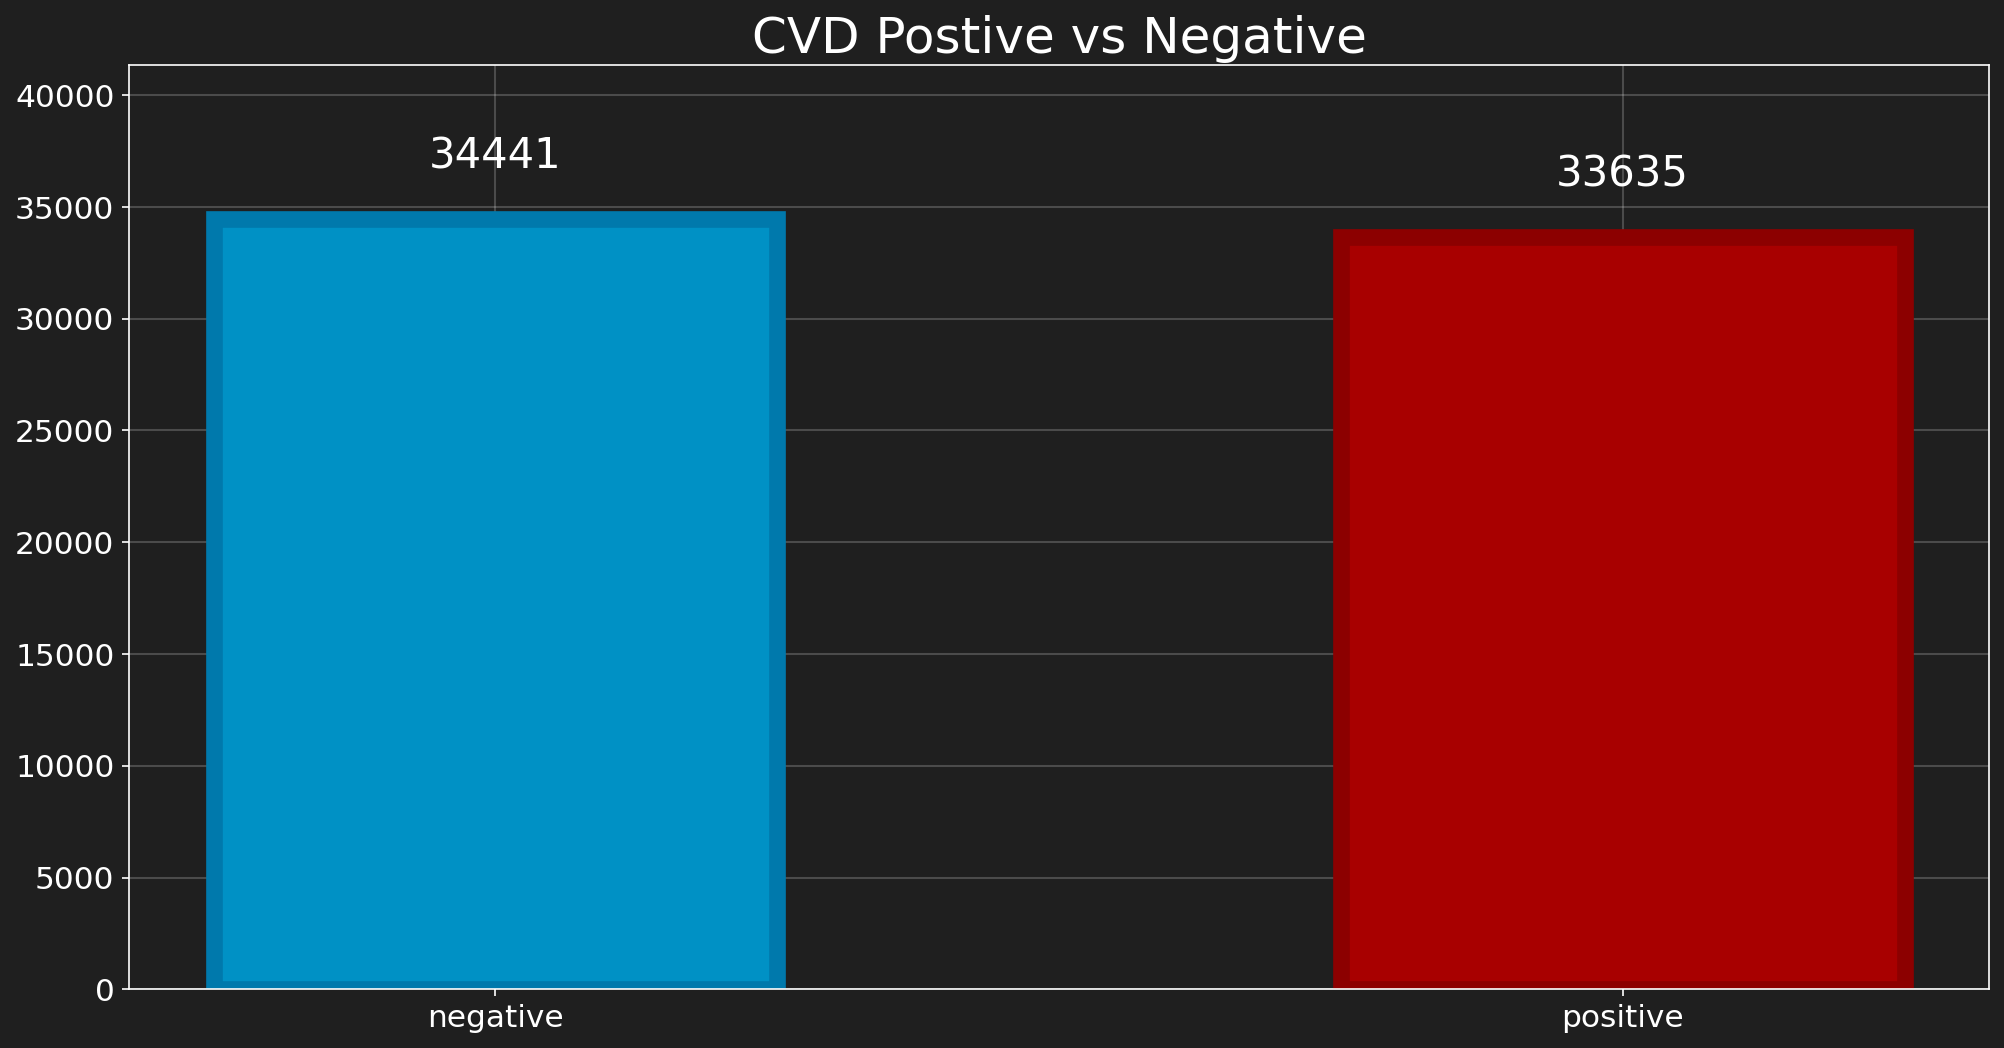

In [1]:
import cvd

cvd.plot_cvd_pos_neg()

 35021 patients have tested negative and 34979 have tested positive for CVD, this is a near 50/50 split which  is a good thing CVD is our target variable and balanced data tends to help produce more accurate classifications.

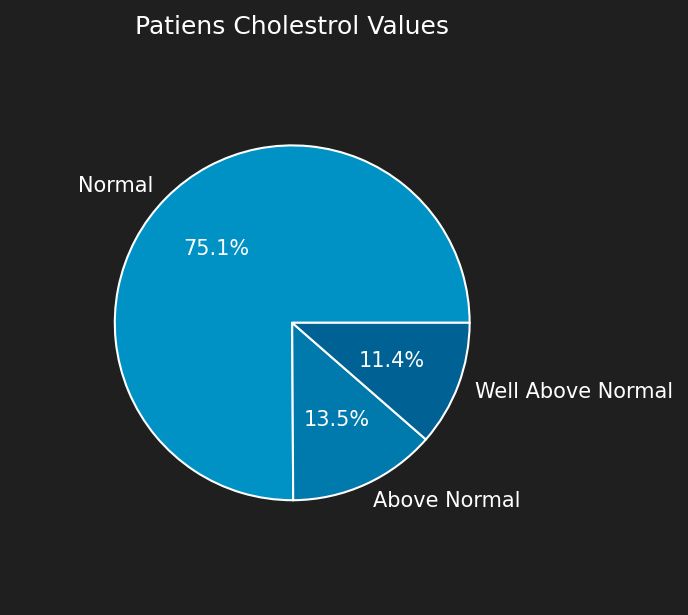

In [2]:
cvd.plot_cholestorol()
       

By definition most patient should have normal cholesterol and this pie chart shows that normal cholesterol is the clear majority with  74.8%.
However the "Above Normal" (13.6%) category is almost the same size as the "Well Above Normal" (11.5%) which is a bit surprising as it does not indicate a geometric nor a normal distribution, in both cases "Well Above Normal" would have been a lot smaller. 

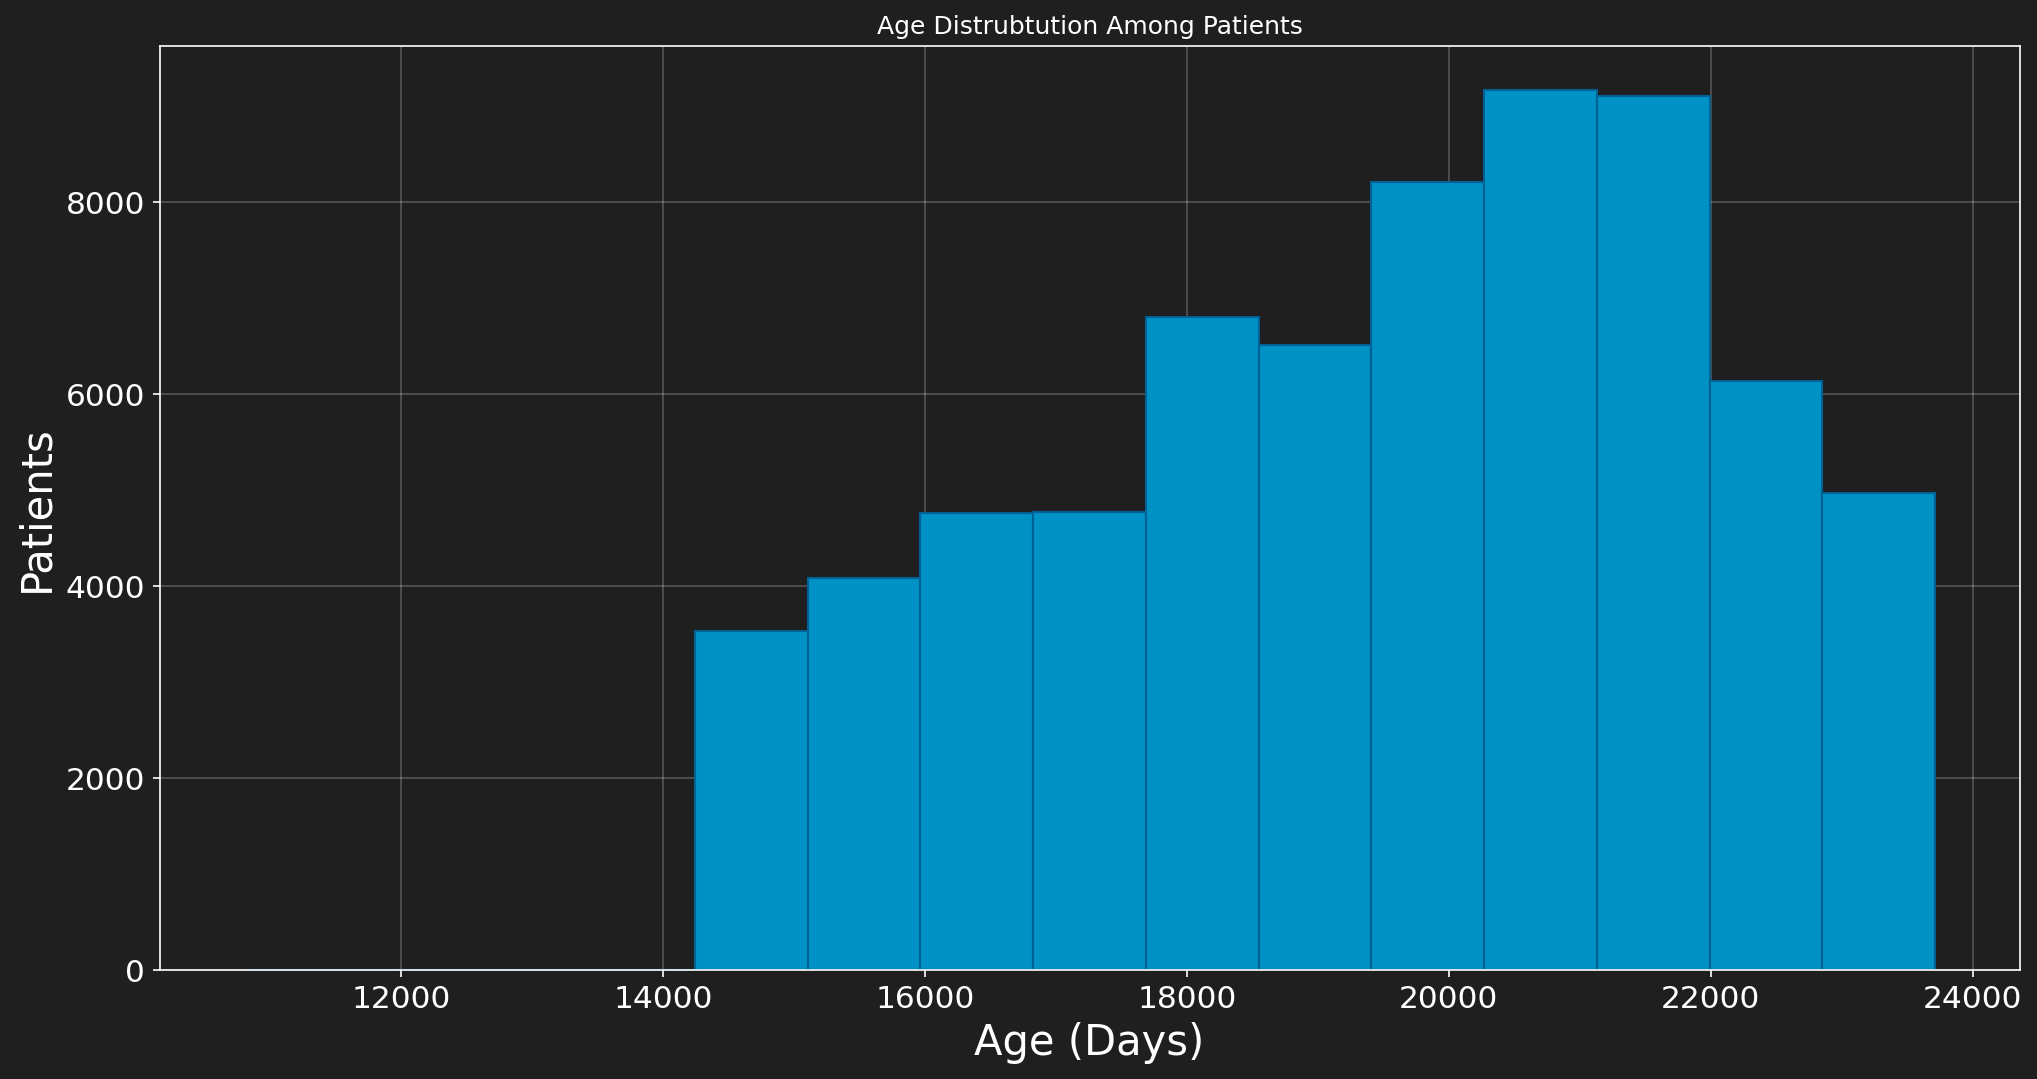

In [3]:
cvd.plot_age()


The first part of the hitogram. age 38 to 48, looks almost like a uniform distribution, 

The patients are all between 38 and 65 years of age. Without having any information about how the data was collect its very difficult to discern any meaning from this age distribution. But, for what ever reason these patients where selected, there age do appear to follow a to gamma distribution. 

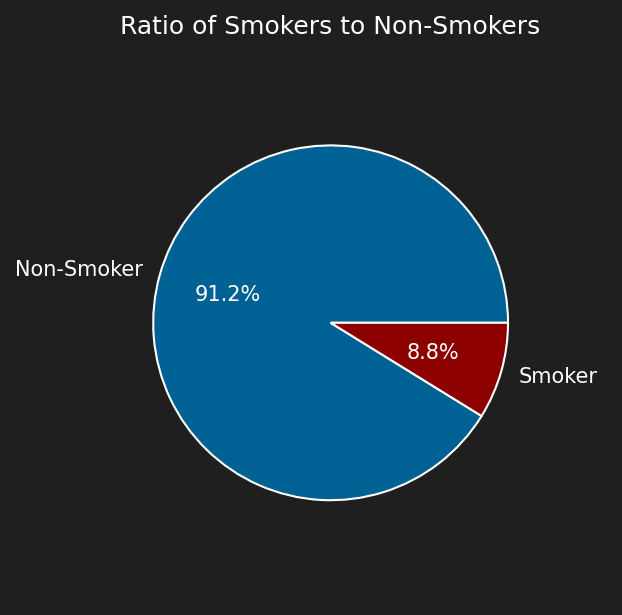

In [4]:
cvd.plot_smoke()

Only nine percent of the patients are smokers, this will make it harder to draw any conclusions about the effect smoking has one CVDs. This might not have posed such a big problem if the dataset had been larger, in that case multiple random samples could have been extracted from both the smokers and non-smokers and then compared against each other thus minimizing the effect of the uneven distribution.  But in this case, with only around 6k smokers in total, the sample sizes is likely to small to produce a reliable result.

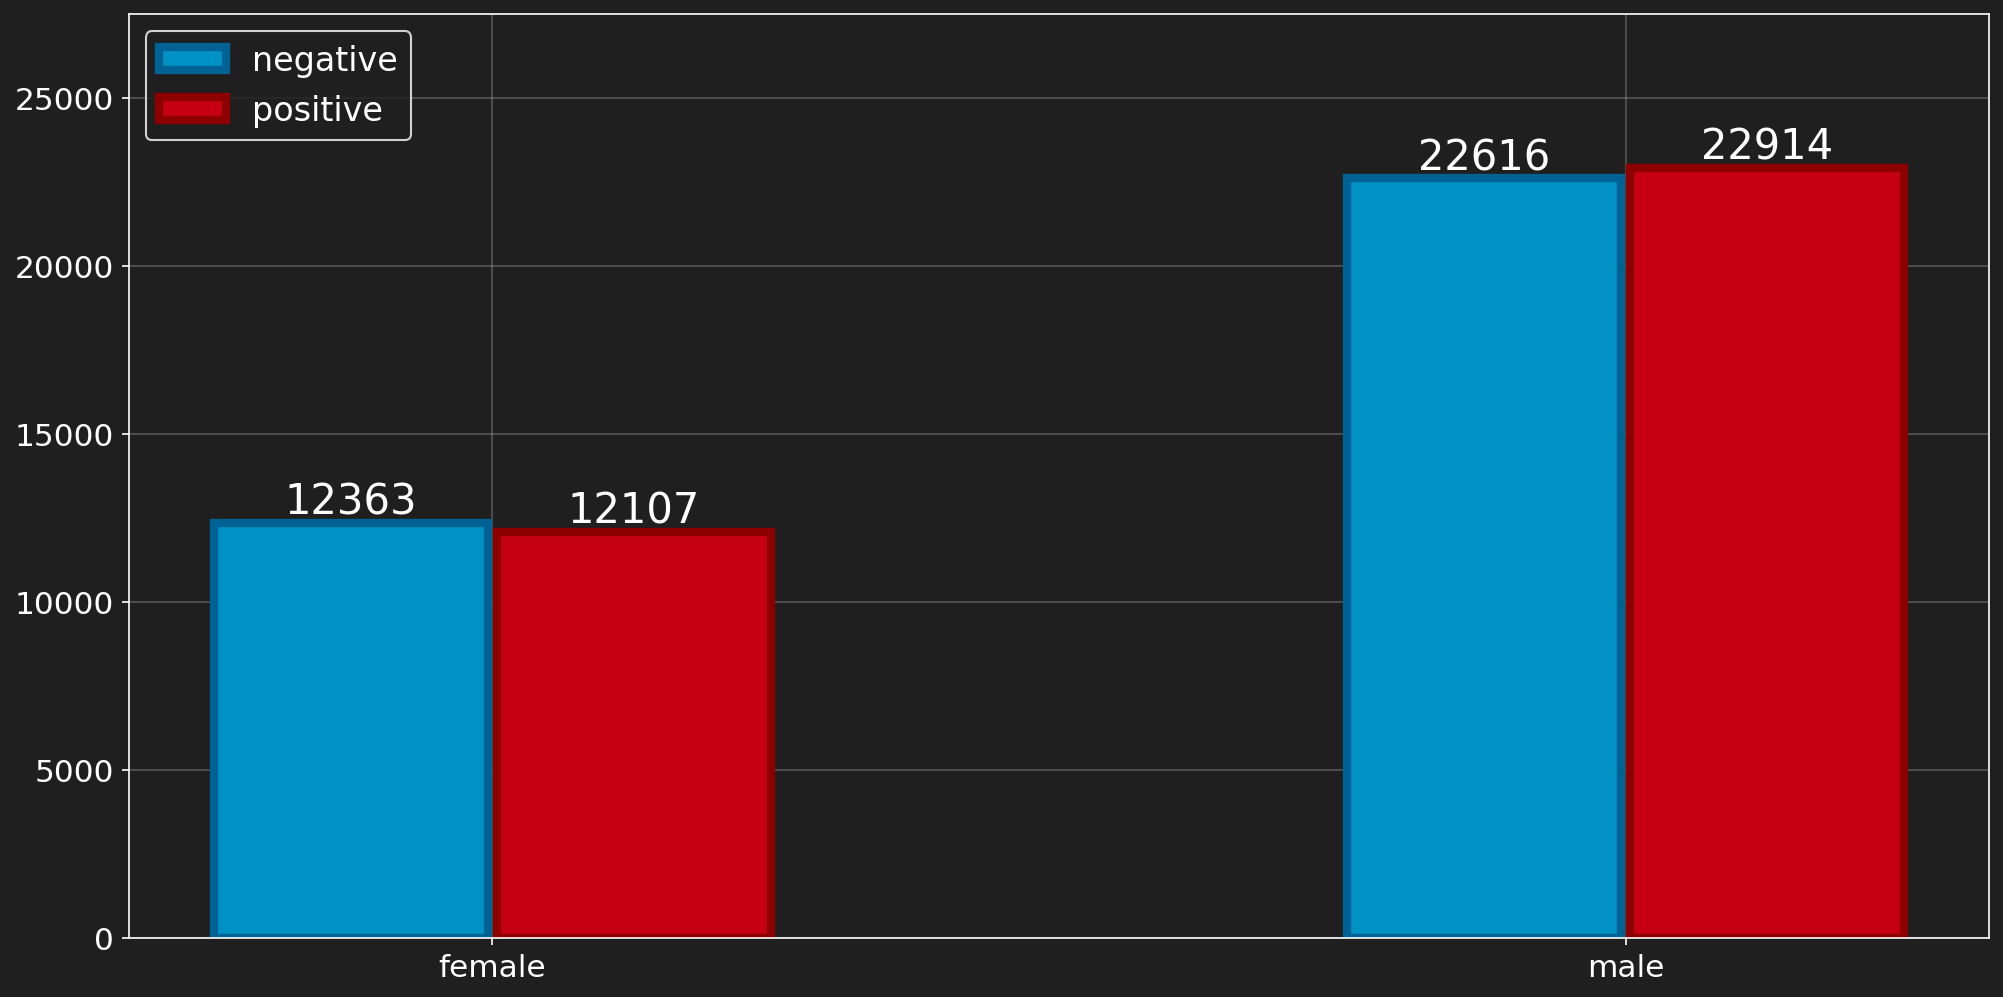

In [6]:

cvd.group_and_plot(cvd.dfg, "gender", "cardio")


It's very even but in this sample the female patients are slightly less likely to be diagnosed with CVD while male patients have are slightly more likely to be given a positive diagnosis. This bar plot also proves that there is a selection bias as random sample of patients would likely produce more even distribution between the genders. 

### Feature Engineering BMI


In [ ]:
cvd.plot_height_weight()

Height follows normal distribution, perhaps slightly skewed to the left.

Weight appears to be similar to a normal distribution except it has a huge spike around 70 kg,

it also has slightly longer slope on the right side, sloops such as these are more inline with a gamma distribution.

A normal distribution is desired because if the features are highly correlated with the target then a linear model can be used to make predictions. A linear model do not necessarily produce better results than non-linear model but they tend to be simpler to implement and demande less resources to run. 

Height and weight are correlated with COV but there also correlated with each other which can give them to influence over the predictions but  this can be mitigated with feature engineering either by removing one of them, or as in this case,  they combined them in to one feature, BMI.

BMI will be calculate using this formula
$$ \frac{weight}{(height/100)^2}$$
(Trefethen Nick, Prof. Numerical Analysis, Publication: Economisst, 2013, Link: people.maths.ox.ac.uk/trefethen/bmi.html)

This dataset contains errors, data that is either wrong or that has been inputted incorrectly so extreme values will be removed to minimize the impact of this false data. 

Data collected from 2011 to 2014 in American males and females above the age of 20.

(U.S Department of Health and Human Services, Publication: Anthropometric Reference Data for Children and Adults: United States, 2016, Link : https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf)

The 5th percentile at around 20 BIM and 95th percentile around 40 BMI with the 50th percentil att around 28 BMI.

To account for some outliers the 5th and 95th percentile will be multiplied by 0.8 and 1.2 respectively aka 20. Which produces a 
range of 16 to 48. 

By reducing outliers error values that could severely influence the training of the models are removed. Some true outliers may also be purged, this makes our models, likely, more accurate but narrows the range of observations that can be predicted, so this is a trade. Also note that some models are more sensitive to outliers then others.

In [7]:
cvd.df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,bmi,bmi_category,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,normal range,Healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,obese (class 1),Elevated
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,normal range,Healthy
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,over weight,Hypertension Stage 1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,normal range,Healthy


In [8]:
cvd.df.shape

(68076, 16)

### Feature Engineering Blood Preasure

To calculate the blood pressure categories 
(Holland Kimberly, 2020, Article: Everything You Need to Know About High Blood Pressure (Hypertension), Link: healthline.com/health/high-blood-pressure-hypertension#causes)

Diastolic feature was first scaled up to 1.65 in order to have the same weight as the Systolic feature, they where then combined in to one value, the same process was applied to the categories. The categories was then assigned with the use of the dictionary keys in combination with an if statement

```
# Switch 
# 1) Loops through a dict 
# 2) uses its keys in an lambda if test 
# 3) if the tests succeeds the value from the key value pair is picked
# 4) if it fails the result is set to the default value
def switch(df, values, exp, di, default):
    results = list()
    for row in df: 
        for key in di.keys():
            result = di[key] if exp(val,key) else default 
            if result != default : break
        results.append(result) 
    return results

scale = 1.65
 
# SYSTOLIC|DIASTOLIC|BLOOD PREASSURE CATEGORY
blood_preasure_grade = {
    (180, 120):"Hypertension Crisis",
    (140, 90):"Hypertension Stage 2",
    (130, 80):"Hypertension Stage 1",
    (120, 80):"Elevated",
}
```

Outliers where removed before these two features where combined, the same method was used as for the BMI. The percentiles where provided by

(Bonge Atanasia, Kazembe Lawrence, Pazvakawambwa Lillian, Article: 
Centile estimation of blood pressure by age and sex for adults aged 35-64 in Namibia, Link: https://uaps2024.popconf.org/uploads/191489) 

Because we don't no where the patients of dataset are from the country where the percentiles are from are largely irrelevant. 

The arbitrary calculation for removing outliers will be a bit 
different because the distribution is mor skewed 
Systolic
25th around 115 
50th around 125
99th around 185

The Diastolic is more similar to a normal distribution

Diastolic
25th around 75
50t around  90
99th around 110

Systolic 
99th percentile will be multiplied by 1.1
25th percentile will be multiplied by 0.7

Diastolic
99th +20
25th -20

### Visualization CVD


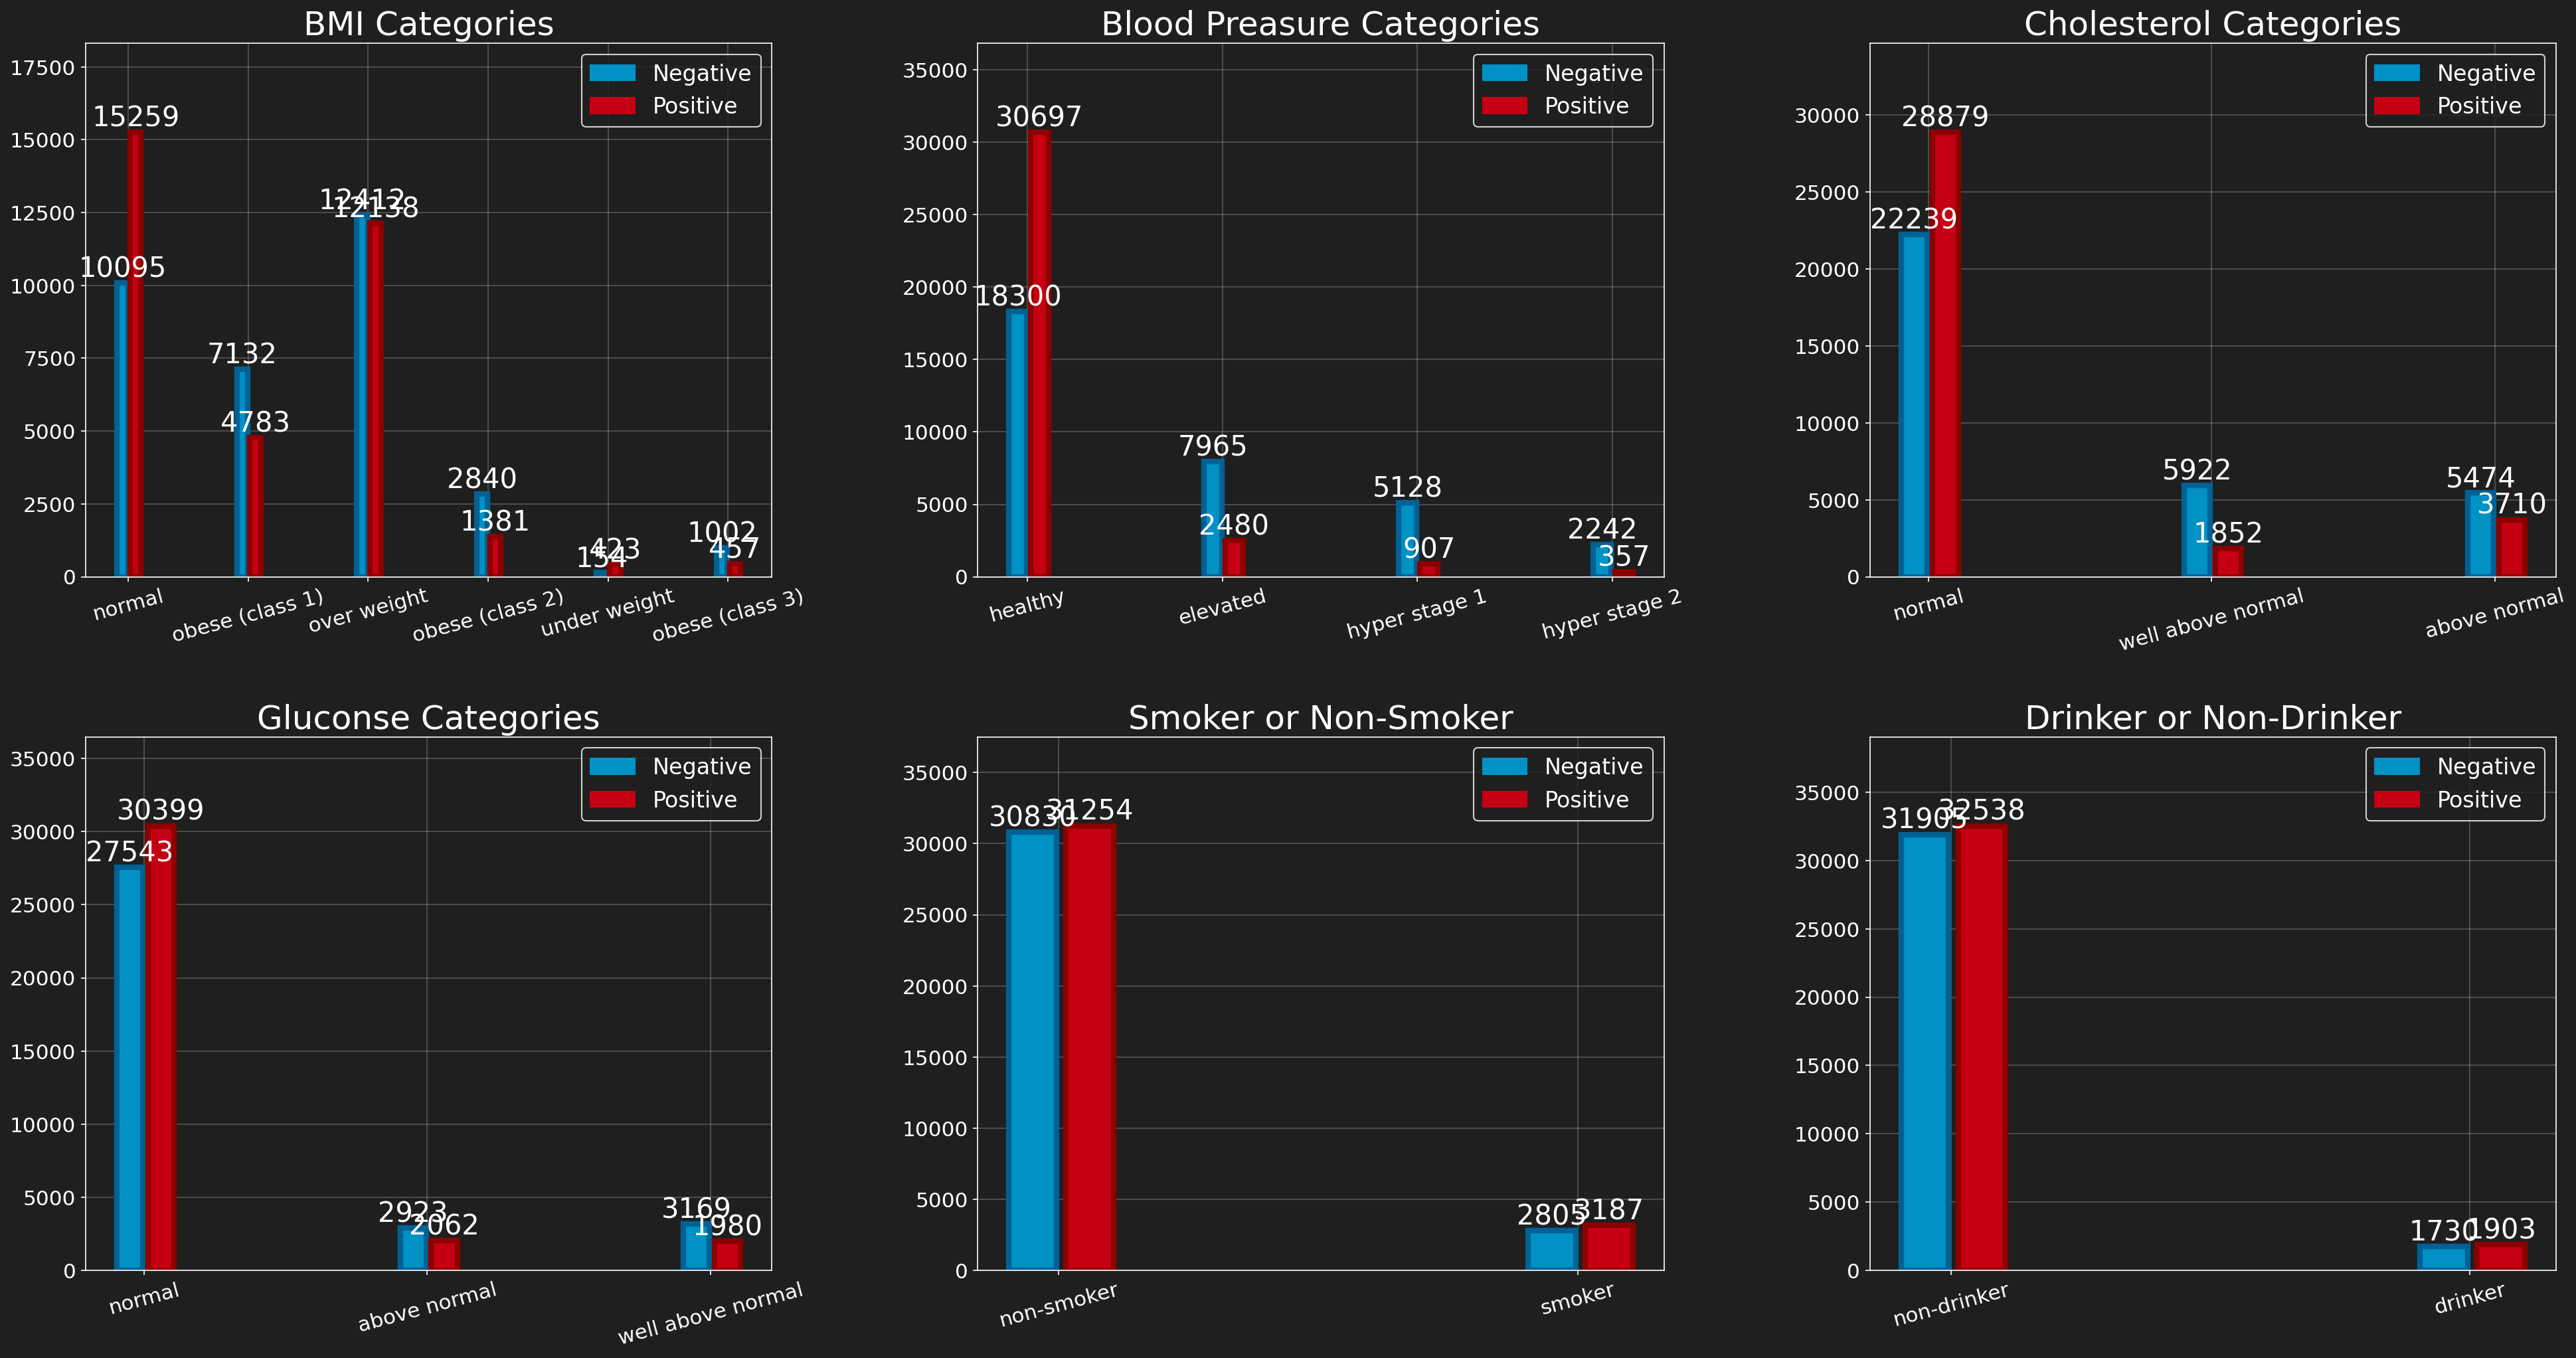

In [11]:
cvd.plot(cvd.df_group, "cardio", cvd.features, cvd.x_labels)

BMI seems to follow a gamma distribution, under weight is very small, then normal and over weight ar similar in average size and then with each obesity class it drops in a sharp curve.

Blood pressure might be more of a geometric distribution a shar drop that slowly titters out. 

We have a very low ratio of Drinkers and Smokers and that might be why we don't see any correlation between CVD and these two features, in a more even distribution these might have had bigger impact.
Having access to patients from past centuries with higher rates of smoking and drinking might have given us more accurate correlation between these two features and the target.

### Visualization Correlations

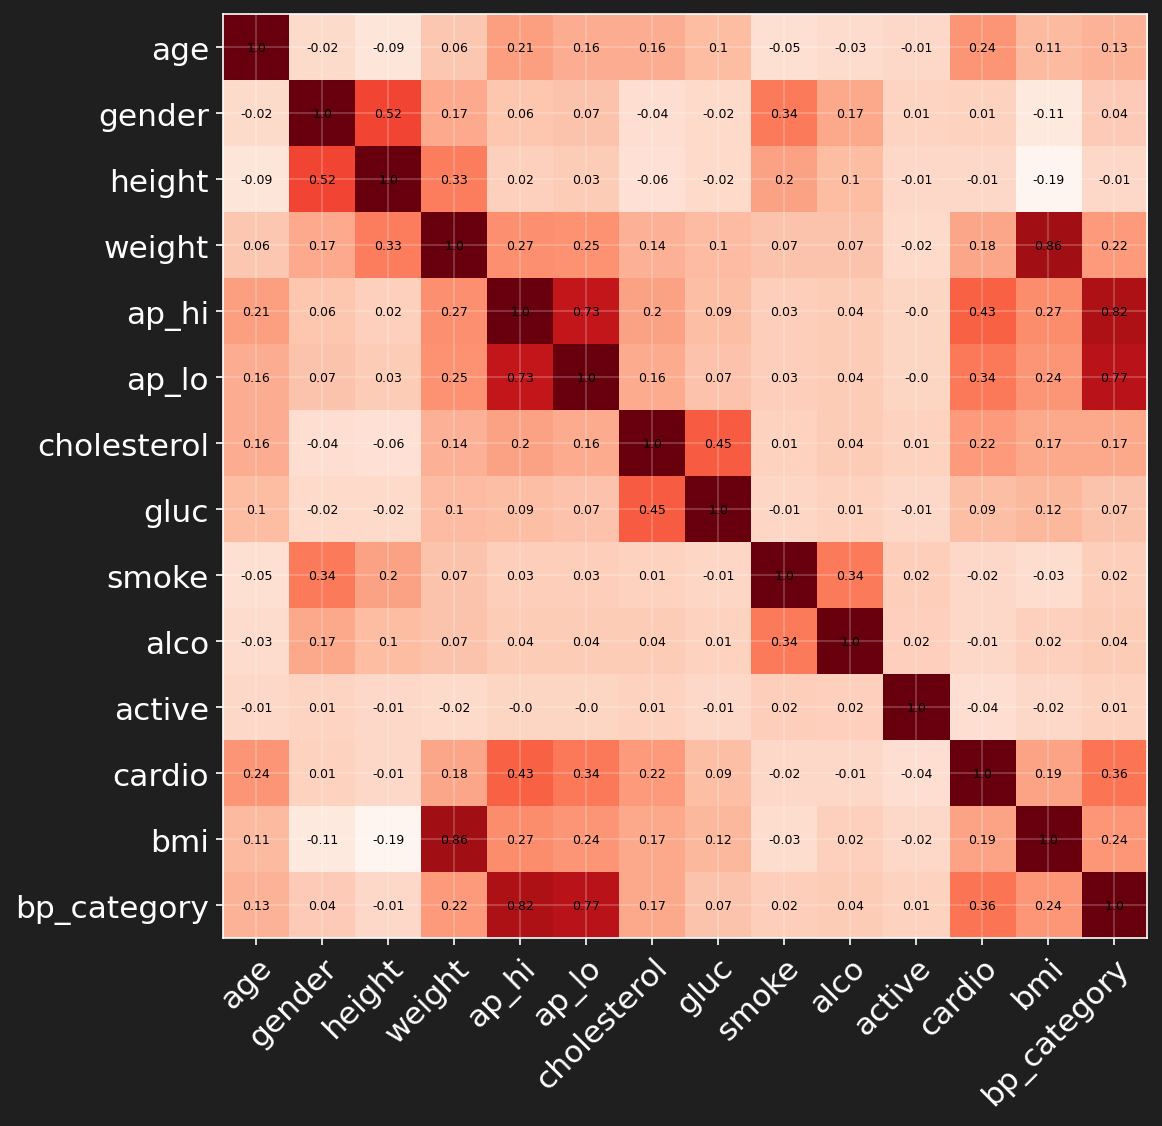

In [12]:
cvd.plot_heatmap()



There is no feature that has a high collinearity with the target cardio, 
but ap_hi, ap_low, age, cholesterol and weight all contribute and it makes sens to 
use them in the model. ap_hi and ap_low does have a high collinearity with each other 
so combining them in to one feature might have been wise.

What is surprising is that smoke, alco and active doesn't seem to have any correlation to the 
target att all, and one could surmise that life style might not have such impact except 
perhaps for food in the form of cholesterol, although this could also be impacted by genetics.

In truth it does feel like we are missing some key feature that would explain the correlation 
we seem to be non-present in the matrix. Perhaps some feature that contained some type 
of genetic information would prove revealing.

# Modell 
___

To better be able to compare the models two different datasets are assembled from the original.
Dataset 1 contains the features : ap_hi, ap_lo, height, weight, bmi_categories 
Dataset 2 contains the features : bmi_categories, bp_categories, gender

bmi_categories was feature engineerd  from height and weight 
bp_categories  was feature engineerd in ap_hi, ap_lo (blood preasure)

Then five models where chosen, the decision was made to provide a large variety, the models where also picked because they are normally used as categorical classifiers and because of hardware limitations some models where excludes such as SVC.

The five models are 
- decision tree
  Tree-based mode that makes decision based on  feature values,
  not unlike a big nested if else statement

- gradient boosting
  Ensemble of decisions tress
  
- k-nearest neighbor
  Non-parametric model, determines the class base on the class of of the data points closest neighbors, good on low dimensional
  datasets
  
- logistic regression
  A linear model for classification, good for simple classification
  tasks
  
- multinomial naive bayes
  A probabilistic classifier based on Bayes theorem, more commonly used for text classification

There is technically a sixth model as voting classifier that uses all five models are also in use 

The process goes as follows 
1) A nested loop that loops through the two data sets and splits them into training, validation and test

2) In order to tune the models there passed through the following steps
   - A `Pipeline` that first scales the data and then normalizes it 
   - The model is added to `GridSearchCV` along with the hyper parameters
   - The parameters are trained and tuned  using the `.fit()` method and the training data
   - The best version aka the version with the best preforming combination of hyper parameters  is extracted with `.best_estimator_`
   - This best version is then used to make a prediction using `.predict()` and the validation data
   - This produces $\hat{y}$ which is used in combination with y validation to produce scores accuracy, recall and precision
   - This best version of the model is add to a list with all the other best versions
   - And lastly the  voting classifier utilizes all the tuned models and is then it self added to the list with all the others

3) All the best models and dataset pairs are then compared based on either accuracy, recall or precision in order to find the model dataset pair that produces the best predictions.

In [21]:
mv = cvd.ModelValidator(cvd.XYL)
mv.score = "accuracy"
mv.verbose = False
mv.initiat_model_tuning()

# Result
___

`score` this is used for categorical targets, you can specify what you're trying to optimize fore
- precision 
  We optimize against False Positives, we want to make sure we get it right, ex quality control 
  
- recall 
  We optimize against False Negatives, we want to make sure we doesn't miss anything
  ex fire alarm, medical examination 
  
- accuracy 
  Tries to get as many correct classifications as possible we don't care if we don't care if we get more FN or more FP we simply want as many TP and TN as possible.

|              | Positive                                                | Negative                                                  |     |
| ------------ | ------------------------------------------------------- | --------------------------------------------------------- | --- |
| **Positive** | True Positive (TP)<br>Matched Fire<br>Fire Present      | False Negative (FN)<br>Matched No-Fire<br>Fire Present    | 1   |
| **Negative** | False Positive (FP)<br>Matched Fire<br>Fire Not Present | True Negative (TN)<br>Matched No-Fire<br>Fire Not Present | 0   |
|              | 1                                                       | 0                                                         |     |

 In test the best model is dependent on which type of score is prioritized 
 
 Naive Bayes Multinominal has the highest precision 0.66 with validation data but with the training data it only gets to 0.58 

  Knn has the best recall both with the validation data and the training data .69 and .74 respectively 

The voting classifier achieves the highest accuracy both with validation data and training data 0.69 in both cases it also has comparatively good recall and precision

In [24]:
mv.score="accuracy"
mv.evaluate_report()



			Model vote_clf | Dataset 1

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      5104
           1       0.75      0.59      0.66      5107

    accuracy                           0.70     10211
   macro avg       0.71      0.70      0.69     10211
weighted avg       0.71      0.70      0.69     10211



			Model vote_clf | Dataset 1



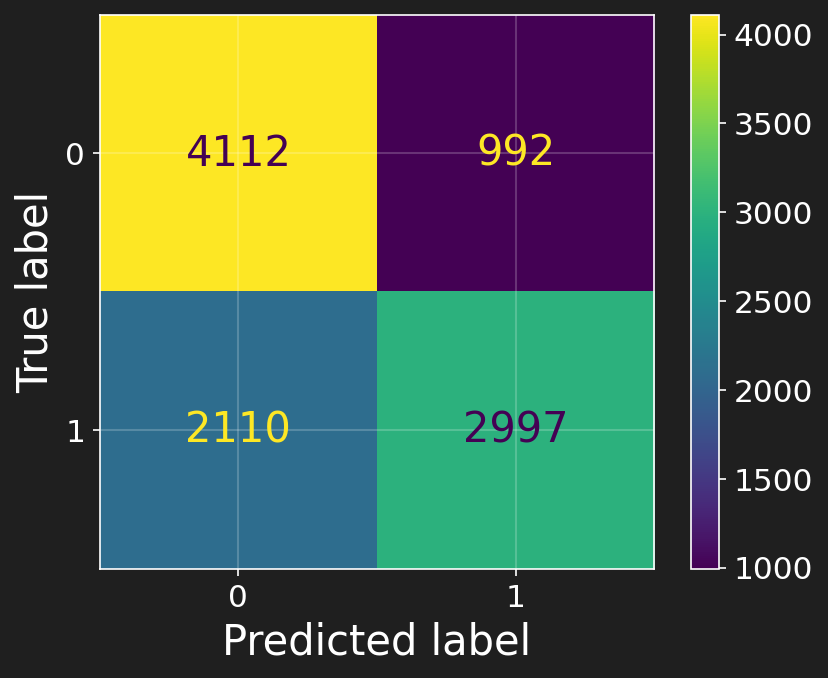

In [23]:
mv.score="accuracy"
mv.evaluate_matrix()

# Discussion
___

Having an accuracy of 0.69 is not a great result, minimum for a model would be 0.8, but this varies widely depending on what the model is trying to classify, in this case is medical data and for model to be considered useful a accuracy above .9 is most likely needed. 

It's also worth pointing out that in the medical context the recall should most likely be prioritized to minimize the chance of missing a patient with CVD.
  
With greater hardware a grater range of hyper parameters could have been tested and perhaps a greater resulted could have been achieved. 

But the case could also be that we are missing some important feature, there where no clear indication of correlation in the heat map and this could suggest that where simply missing some important piece of data. Perhaps CVD has some genetic component hat can't easily be explained bey the currant features all though the current features could correlated with some type of genetic data and methods such as feature expansions might be useful in finding such correlations and thus allow for better predictions.
